In [126]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from market_data import MarketDataYFinance
import datetime as dt
import yfinance as yf 

In [120]:
# Get SP500 Tickers
sp500 = pd.read_csv('/Users/talhajamal/Desktop/Code/Daily Market Update /data/sp500.csv')
sp500_tickers = ','.join(sp500['Symbol']).replace(',',' ')

In [121]:
# 1 Year Data
data = yf.download(sp500_tickers, period='2y')

[*********************100%%**********************]  503 of 503 completed


2 Failed downloads:
['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (period=2y)')
['BRK.B']: Exception('%ticker%: No data found, symbol may be delisted')


In [122]:
# Performance Metrics
performance_metrics = {
    '1d': data['Adj Close'].pct_change(fill_method=None).tail(1) * 100,
    '1w': data['Adj Close'].pct_change(fill_method=None, periods=5).tail(1) * 100,
    '1m': data['Adj Close'].pct_change(fill_method=None, periods=21).tail(1) * 100,
    '1y': data['Adj Close'].pct_change(fill_method=None, periods=252).tail(1) * 100
}

In [123]:
# Find top 10 performing stocks for each period
top_performers = {period: metric.iloc[0].nlargest(10) for period, metric in performance_metrics.items()}

In [124]:
one_day_performance = top_performers['1d']
one_week_performance = top_performers['1w']
one_month_performance = top_performers['1m']
one_year_performance = top_performers['1y']

ANSS 18.08286273321169
MRNA 4.09170203784166
ALB 3.1900993379185616
ALLE 2.528250188067882
BMY 2.0093691527911295
INTC 1.9541166804680765
INCY 1.8803693843978841
RVTY 1.8437943540605906
EXPD 1.7683788786169163
AMGN 1.729143780484943


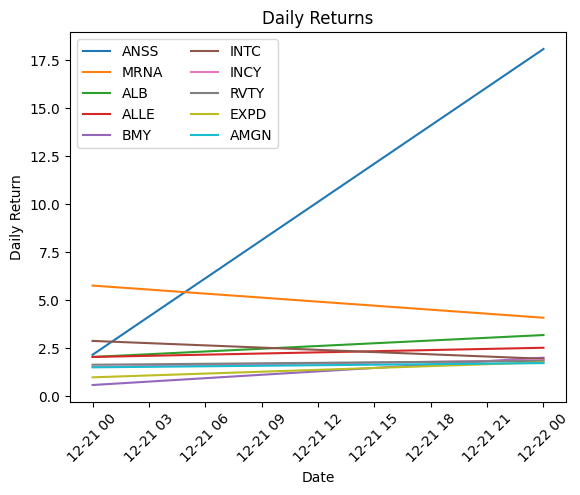

In [171]:
# Plot of best performing stocks over 1 Day
for ticker, ret in one_day_performance.items():
    #Calculate Daily Return
    print(ticker, ret)
    plt.plot(data['Adj Close'][ticker].pct_change().tail(2) * 100, label=ticker)
plt.title('Daily Returns')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Daily Return')
plt.legend(loc='upper left', ncol=2)
plt.show()

ANSS 21.156127358910037
MRNA 10.324377436188193
ILMN 10.149489914042364
JCI 8.199853478958175
ENPH 8.12621648887526
ALLE 7.317908738234302
GOOGL 6.704373288420795
PFE 6.646641057245595
GOOG 6.634791636122106
ALGN 6.611505812922003


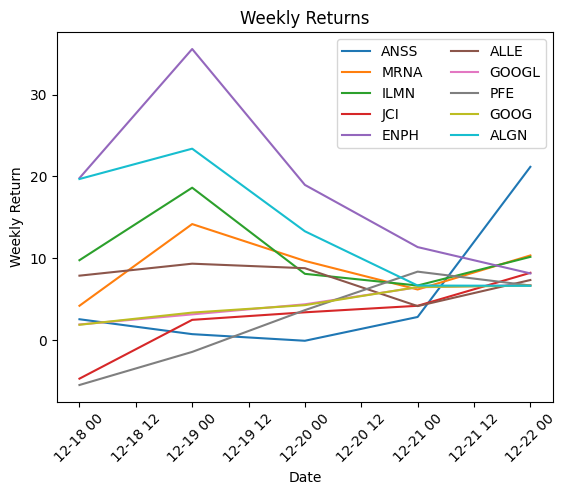

In [161]:
# Plot of best performing stocks over 1 Week
for ticker, ret in one_week_performance.items():
    print(ticker, ret)
    plt.plot(data['Adj Close'][ticker].pct_change(periods=5).tail(5) * 100, label=ticker)
plt.title('Weekly Returns')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Weekly Return')
plt.legend(loc='upper right', ncol=2)
plt.show()

NCLH 45.587215170989694
BBWI 45.52515793438978
ILMN 43.20785284446627
ENPH 33.72256444516255
BXP 31.289372633525538
CCL 30.82239084894478
GM 28.551174518230592
DFS 28.356651204944928
CMA 28.141767256543847
ZION 27.86980585618668


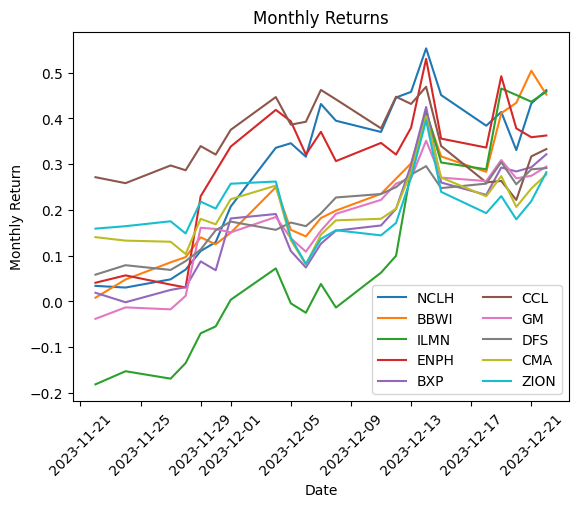

In [170]:
# Plot of best performing stocks over 1 Month
for ticker, ret in one_month_performance.items():
    print(ticker, ret)
    plt.plot(data['Adj Close'][ticker].pct_change(periods=22).tail(22), label=ticker)
plt.title('Monthly Returns')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Monthly Return')
plt.legend(loc='lower right', ncol=2)
plt.show()

NVDA 196.0527871467694
META 195.08183729526502
BLDR 152.819352434538
RCL 147.46188634529113
UBER 143.33595267850106
PHM 125.87009677331436
CCL 123.23114772460943
AMD 106.26478350184021
AVGO 104.46443279297833
CRM 104.40521112811867


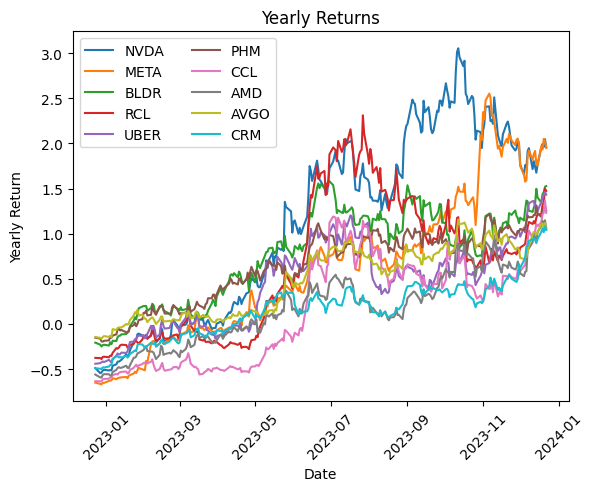

In [168]:
# Plot of best performing stocks over 1 Year
for ticker, ret in one_year_performance.items():
    print(ticker, ret)
    plt.plot(data['Adj Close'][ticker].pct_change(periods=252).tail(252), label=ticker)
plt.title('Yearly Returns')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Yearly Return')
plt.legend(loc='upper left', ncol=2)
plt.show()